# ASSIGNMENT 3 - INTRO TO MACHINE LEARNING | Logistic Regression, LDA and QDA


> **FULL MARKS = 200**



**Note:** To submit the assignment, please follow the same steps and in assignments 1 & 2.

In this assignment we will use things we have learned from previous exercises. 

This assignment is comparitively more difficult than the previous modules. We will implement everything from scratch in this assignment. You will not be given instructions on how to load data, plot data, standardize/normalize data, how to write functions and many more. You will be given instructions on what you will be doing. **SO PLEASE START THIS ASSIGNMENT AS EARLY AS POSSIBLE**

1. **Implementing Logistic Regression from Scratch | 24 TASKS - SCORE : 115**
    
    References
    > https://en.wikipedia.org/wiki/Logistic_regression

    > https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

    > https://hackernoon.com/logistic-regression-in-python-from-scratch-954c0196d258

    > https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac

    > https://stackabuse.com/understanding-roc-curves-with-python/

    > https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html

    > https://datascience.stackexchange.com/questions/40067/confusion-matrix-three-classes-python

    > https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

    > https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/

    > https://docs.scipy.org/doc/numpy/reference/generated/numpy.hsplit.html



2. **Understanding and implementing LDA from sratch | 3 TASKS - SCORE : 55**
  
  References
  > https://www.statisticssolutions.com/discriminant-analysis/

  > https://en.wikipedia.org/wiki/Linear_discriminant_analysis

  > https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2

  > https://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html

3. **Understanding and implementing LDA and QDA using scikitlearn | 6 TASKS - SCORE : 30**
  
  References
  > https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py


### 1. Implementing Logistic Regression from Scratch
---



---



***EXERCISE NO. 1***

> **SCORE : 65**



In [0]:
# The following libraries are imported for you
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
# I found following website really useful
# https://brohrer.github.io/matplotlib_framing.html
import pandas as pd

# See details of this dataset @
# https://en.wikipedia.org/wiki/Iris_flower_data_set

*EXERCISE NO. 1 : TASK 1*

> **SCORE : 0.5*7**



In [252]:
# Write code below each comment to accomplish the given task

# load the iris flower dataset
iris = load_iris()

# This data is in dictionary format print all the keys
print("Keys of iris_dataset:\n", iris.keys())

# Lets print the data description
print(iris['DESCR'][:500] + "\n...")

# Lets print the feature names

print("Feature names:\n", iris['feature_names'])


# Lets print the target_names

print("Target names:", iris['target_names'])


# Lets print target shape (dimensions)
print("Shape of data:", iris['data'].shape)


# Let print data(FEATURE) shape (dimensions)

print(iris['feature_names'])
print(iris['target'].shape)



Keys of iris_dataset:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                

...
Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Shape of data: (150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150,)


*EXERCISE NO. 1 : TASK 2*

> **SCORE : 0.5X3=1.5**



In [253]:
# Write code below each comment to accomplish the task

# Import pandas and use feature_names as column, data as values to create dffeature

dffeature = pd.DataFrame(data = iris.data, columns=iris.feature_names)
# Create dftarget dataframe using target as data and ['label'] as column
dftarget =  pd.DataFrame(data = iris.target, columns= ['label'])

# The target labels in the original dataset are marked as 0, 1, 2. Let's replace
# the numbers with the actual flower species names ('setosa', 'versicolor', 'virginica').
# E.g. replace all 0s with the 0th value of iris.target_names, all 1s with the 1st value 
# and so on in dftarget.
# Hint use the DataFrame.apply() method

dftarget = dftarget['label'].apply(lambda x: iris.target_names[0] if x==0 else (iris.target_names[1] if x==1  else iris.target_names[2]))

# dftarget['target'] = target
# dftarget
print(dftarget.to_string())



0          setosa
1          setosa
2          setosa
3          setosa
4          setosa
5          setosa
6          setosa
7          setosa
8          setosa
9          setosa
10         setosa
11         setosa
12         setosa
13         setosa
14         setosa
15         setosa
16         setosa
17         setosa
18         setosa
19         setosa
20         setosa
21         setosa
22         setosa
23         setosa
24         setosa
25         setosa
26         setosa
27         setosa
28         setosa
29         setosa
30         setosa
31         setosa
32         setosa
33         setosa
34         setosa
35         setosa
36         setosa
37         setosa
38         setosa
39         setosa
40         setosa
41         setosa
42         setosa
43         setosa
44         setosa
45         setosa
46         setosa
47         setosa
48         setosa
49         setosa
50     versicolor
51     versicolor
52     versicolor
53     versicolor
54     versicolor
55     ver

*EXERCISE NO. 1 : TASK 3*

> **SCORE : 0.5X4=2**



In [254]:
# Write code below each comment to accomplish the task

# Now concatenate column-wise and create new dataframe df contataining both
# the features and the target values. Use the argument sort=False
frames=[dffeature,dftarget]

df= pd.concat(frames, sort=False, axis=1)

# Print the head of the data
print(df.head())

# Print the tail of the data
print(df.tail())


# Check if there are any NA values

df.isna().sum()

# Drop rows which contain missing values.




   sepal length (cm)  sepal width (cm)  ...  petal width (cm)   label
0                5.1               3.5  ...               0.2  setosa
1                4.9               3.0  ...               0.2  setosa
2                4.7               3.2  ...               0.2  setosa
3                4.6               3.1  ...               0.2  setosa
4                5.0               3.6  ...               0.2  setosa

[5 rows x 5 columns]
     sepal length (cm)  sepal width (cm)  ...  petal width (cm)      label
145                6.7               3.0  ...               2.3  virginica
146                6.3               2.5  ...               1.9  virginica
147                6.5               3.0  ...               2.0  virginica
148                6.2               3.4  ...               2.3  virginica
149                5.9               3.0  ...               1.8  virginica

[5 rows x 5 columns]


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

In [0]:
# Now import seaborn and plot data so that you can visualize pairplot
# Important note use color/hue 
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
# Task 1 use hue as label 
import seaborn as sns

*EXERCISE NO. 1 : TASK 4*

> **SCORE : 2**



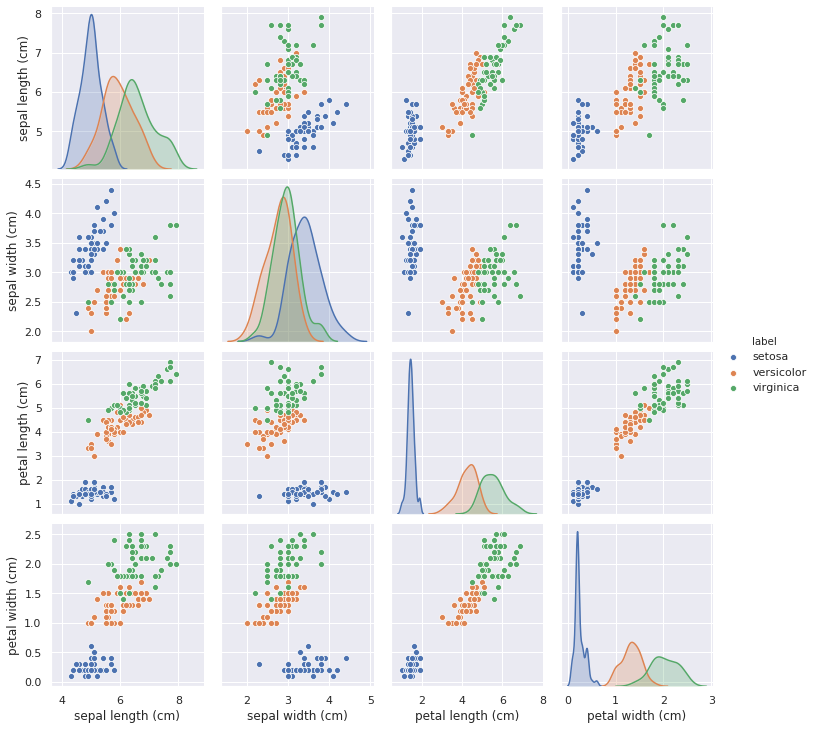

In [256]:
# Plot the feautres in a pairplot diagram. Use params hue='label' and kind='scatter'
sns.pairplot(df, hue='label', kind = 'scatter')

*EXERCISE NO. 1 : TASK 5*

> **SCORE : 0.5**



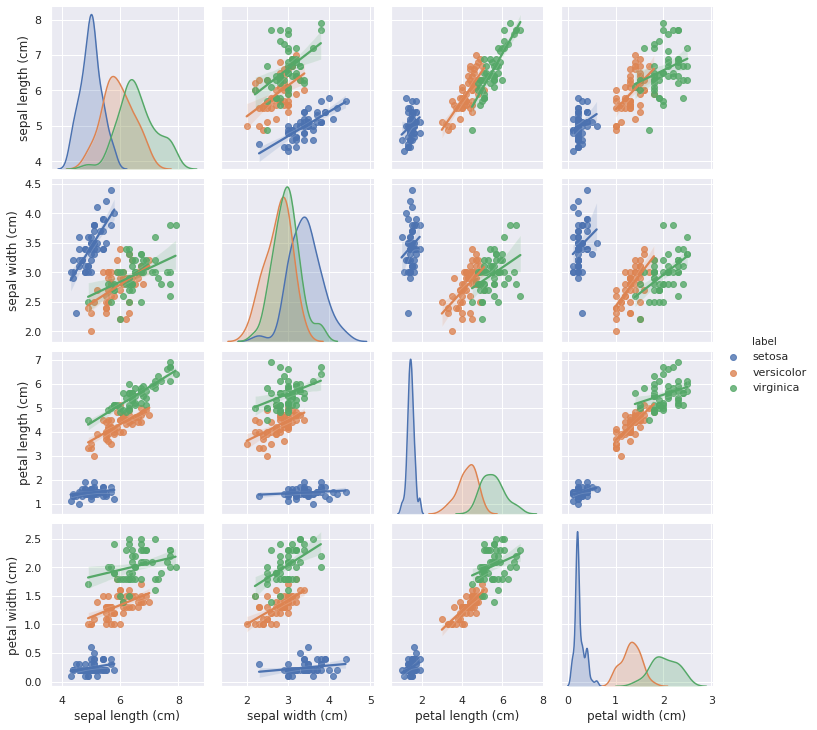

In [257]:
# Repeat the above using the value 'reg' (regression) for the parameter kind 
sns.pairplot(df, hue='label', kind = 'reg')

*EXERCISE NO. 1 : TASK 6*

> **SCORE : 0.5**



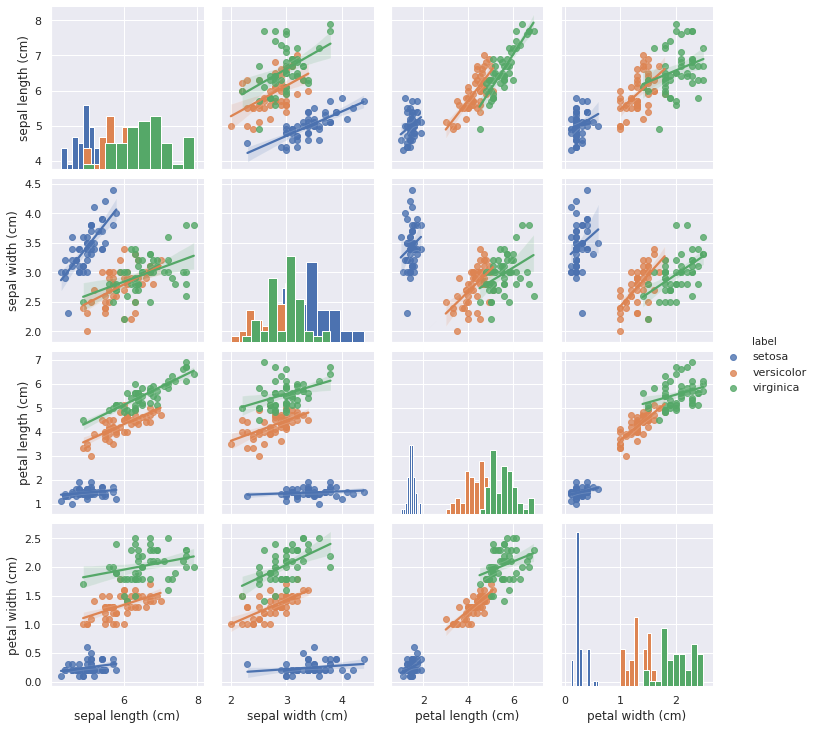

In [258]:
# Repeat the above using the value 'reg' (regression) for the parameter kind and 
# add the parameter diag_kind='hist'
sns.pairplot(df, hue='label',kind = 'reg',diag_kind= 'hist')

*EXERCISE NO. 1 : TASK 7*

> **SCORE : 5**



In [0]:
# Now you might have understood something about the dataset
# What are your 3 major observation??
# Your answer goes here

'1. Setosa has a smaller sepal length, petal width, an petal length than the others, but a greater sepal width'
'2. Scatterplot has the best visual'
'3. versicolor and virginica and gerally larger than setosa with virfinica being the largest in petal length, sepal length, petal width'

*EXERCISE NO. 1 : TASK 8*

> **SCORE : 1**



In [259]:
# Now use the sklearn data train test split functionality to split data into train
# and test parts with 80/20% split.
from sklearn.model_selection import train_test_split

# X=dftarget.apply(lambda x: np.argwhere( x == iris.target_names))
# y=dftarget['label']

# X = feature values, all the columns except the last column
X = dffeature.values

# y = target values, last column of the data frame
y = dftarget.apply(lambda x: np.argwhere( x == iris.target_names)[0][0]).values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

print('Print first 5 values X_train: ', X_train[0:5])
print('Print first 5 values X_test: ',X_test[0:5])
print('Print first 5 values y_train: ',y_train[0:5])
print('Print first 5 values y_test: ',y_test[0:5])

Print first 5 values X_train:  [[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]
Print first 5 values X_test:  [[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]]
Print first 5 values y_train:  [2 1 0 2 2]
Print first 5 values y_test:  [2 1 0 2 0]


In [0]:
# If you have gone through some of the details of logistic regression
# You might have come accross sigmoid function

![sigmoid](https://www.researchgate.net/profile/Knut_Kvaal/publication/239269767/figure/fig2/AS:643520205430784@1530438581076/An-illustration-of-the-signal-processing-in-a-sigmoid-function.png)

*EXERCISE NO. 1 : TASK 9*

> **SCORE : 5**



49.90000000000143
-50.0
1.0
1.928749847963918e-22


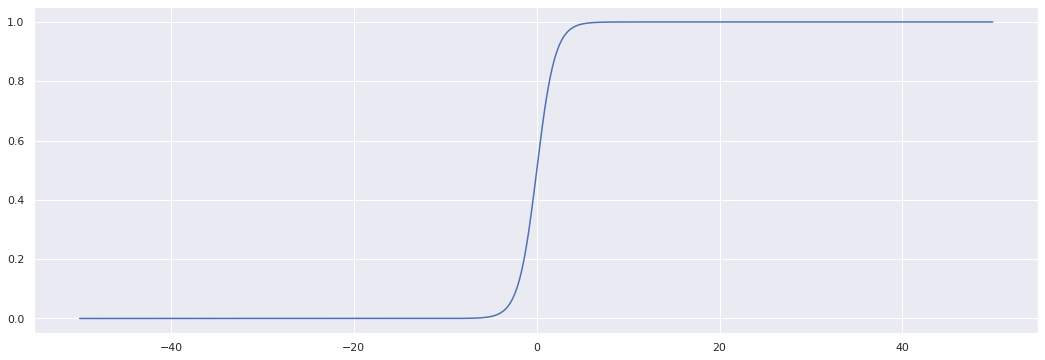

In [261]:
# Now using numpy we implement a sigmoid function that squishes any given input to between 0 and 1
# NOTE: x may be a scalar, a vector, or a matrix. The function works in all cases
# by using element-wise arithmetic operations (i.e. './' and '.+')
import numpy as np

def sigmoid(x):
   return 1/(1+np.exp(-x))


# Now here use np.arange function to create an array values from -50 to 50. 
# Use step size as 0.1 and pass this to sigmoid and store the output in the sigout variable
x = np.arange(-50,50,0.1)


sigout = sigmoid(x)

# print max and min of x 

print(max(x))
print(min(x))
# print max and min of sigout
print(max(sigout))
print(min(sigout))


# Now use matplotlib to plot x in x and sigout in y
plt.plot(x,sigout)
# plt.ylabel('cost')
# plt.xlabel('iterations (per hundreds)')
# plt.title('Cost reduction over time')
plt.show()



# You might have understood something from above experiment
# Write two important things you have noticed about sigmoid function
# Your answer goes here
# "1. Output ranges from 0 to 1."
# "2. Output changes significantly near x = -5, to x = 5  "

In [0]:
# Now lets talk about the loss function in logistic regression

![alt text](https://userweb.cs.txstate.edu/~k_b459/logi.png)

In the formula above $ h_\theta(x^{(i)}) = \hat{y}^{(i)} $ is the predicted value for observation $ i $, whereas, $ y^{(i)} $ is the observed value in the dataset. $ h_\theta $ is the regression function.

*EXERCISE NO. 1 : TASK 10*

> **SCORE : 10**



In [263]:
# Implement above logistic loss function as logistic_loss. 
# Remember your input will be the vectors y and y_hat, here h_theta_xi is y_hat and y_i is y
# The above loss is also known as binary cross entropy loss
# https://en.wikipedia.org/wiki/Cross_entropy
def logistic_loss(y, y_hat):
  return (-np.mean(y*np.log(y_hat)+(1-y)*np.log(1-y_hat)))

y=np.array([1,0,1],)
y_hat=np.array([0.54,0.07,0.001])
m = len(y)
 
print(logistic_loss(y,y_hat))
  


2.53217070374693


*EXERCISE NO. 1 : TASK 11*

> **SCORE : 1**



In [264]:
# Now pay attention to following important instructions
# Lets take a  simple example where x has size (100, 1) and y has size (100,1) here 100 is just the number of instances
# Important thing is number '1' which is actual dimension of x and y (coincident-here our x and y has same dimension)
# So now we can formulate this problem as linear regression problem y = w*x + b
# Now assume everything as matrix multiplication and additon

# Now pay attention to following few examples
import numpy as np
x = np.random.randn(100,1) #my data set has 100 instances and 1 feature
y = np.random.randint(0,2,(100,1)) # my data set target with dimension 1
w = np.random.randn(1,1)
b = np.random.randn(1,1)

y_hat = x@w + b #this is my linear model
print(y_hat.shape) # this will be (100,1)
print(y_hat.shape == y.shape) # this should be true

# Lets take another example
x = np.random.randn(100,4) #my data set has 100 instances and 4 feature
y = np.random.randint(0,2,(100,1)) # my data set target w-np.mean(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))ith dimension 1
w = np.random.randn(4,1)
b = np.random.randn(1,1)

y_hat = x@w + b #this is my linear model
print(y_hat.shape) # this will be (100,1)
print(y_hat.shape == y.shape) # this should be true


# Lets take another example
x = np.random.randn(100,1) #my data set has 100 instances and 1 feature
y = np.random.randint(0,2,(100,3)) # my data set target with dimension 3
w = np.random.randn(1,3)
b = np.random.randn(1,3)

y_hat = x@w + b #this is my linear model
print(y_hat.shape) # this will be (100,3)
print(y_hat.shape == y.shape) # this should be true

# So now you can relate this to our problem
# our data has 4 features and label has 3 dimension 
# so it is now what random w and b should be created
# your code goes here
w = np.random.randn(4,3)
b = np.random.randn(1,3)

# But if you see iris.target data shape it is (?,1) 
# If you see unique values in iris.target they are 0,1,2
print(iris.target.shape)
print(np.unique(iris.target))

# Now considering this you have to change our real x and y 
#There is nothing to change for x
X = iris.data
Y = np.eye(np.max(iris.target)+1)[iris.target]

# Now use again train test split to create new xtrain,xtest, ytrain and ytest
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=0)

(100, 1)
True
(100, 1)
True
(100, 3)
True
(150,)
[0 1 2]


*EXERCISE NO. 1 : TASK 12*

> **SCORE : 20**



In [0]:
# Now let us create our model 
# use lambda function to create a model
# this must first compute dot product of x and w then add b and pass this result to sigmoid and return from model
from tqdm import tqdm

class Model:
  def __init__(self, w, b, epoch=50, learning_rate = 1e-3):
    self.w = w
    self.b = b
    self.epoch = epoch
    self.learning_rate = 1e-3
  
  def sigmoid(self, x):
    # implement sigmoid function
    return 1 / (1 + np.exp(-x))

  def logistic_loss(self,y, y_hat):
    # implement logistic loss
    return (-np.mean(y*np.log(y_hat)+(1-y)*np.log(1-y_hat)))

  def predict(self, x):
    # return argmax of output from probability from dim 1
    return np.argmax(x,1)
  
  def probability(self,x):
    # probability is simply dot product of x and w plus b
    out = np.dot(x,self.w) +self.b
    print('I am here',out.shape)
    prob= self.sigmoid(out)
    
    return prob
    
  def fit(self, x, y, xtest, ytest, atevery=50):
    record = {'train':{'loss':[],'accuracy':[]},'test':{'loss':[],'accuracy':[]}}
    stream = tqdm(range(self.epoch))
    print(x.shape)
    for epoch in stream:
      # z isa probability
      z = self.probability(x)
      # loss is a logistic loss
      train_loss = self.logistic_loss(y,z)
      # dz as error which is difference of probability with real output
      dz = (z-y)
      # m is length of data which is actually length of error(dz)
      m = len(dz)

      # partial dw or derivative of dw is actually the dot product between x and error(dz) divided by m
      dw = np.dot(x.T, dz)/m 
      # db is sum of dz across 0 dimension, use keepdims=True while calculating sum
      db = np.sum(dz,keepdims=True)

      # Update the w it is difference between current and product of partial weight and learning rate
      self.w = self.w - dw*self.learning_rate
      # Update the b it is difference between current and product of partial weight and learning rate
      self.b = self.b - db*self.learning_rate

      # Print every 50 steps
      if epoch%atevery==0:
        record['train']['loss'].append(train_loss)
        record['train']['accuracy'].append(self.score(x,y))
        loss = self.logistic_loss(ytest, self.probability(xtest))
        accuracy = self.score(xtest,ytest)
        record['test']['loss'].append(loss)
        record['test']['accuracy'].append(accuracy)
        stream.set_postfix_str(f'loss : {loss:.2f}, accuracy : {accuracy:.2f}')
    return record

  def score(self, xtest, ytest):
    # use np.argmax along dimension 1 to compute ylabel values that may be 0,1,or 2
    ylabel = np.argmax(ytest,1)
    # use predict function on xtest to calculate ylabel_
    ylabel_ = self.predict(xtest)
    # matches is == comparision between ylabel and ylabel_
    matches = (ylabel == ylabel_)

    # m is length of matches
    # m = len(matches)

    # accuracy is 100* (sum of all matches divided by ,)
    accuracy = 100 * matches.mean()
    # return accuracy
    return accuracy

  0%|          | 0/50 [00:00<?, ?it/s, loss : 1.99, accuracy : 36.67]

(120, 4)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)


  0%|          | 0/50 [00:00<?, ?it/s, loss : 1.49, accuracy : 36.67]

I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)


100%|██████████| 50/50 [00:00<00:00, 290.07it/s, loss : 0.87, accuracy : 36.67]


I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (30, 3)
I

[]

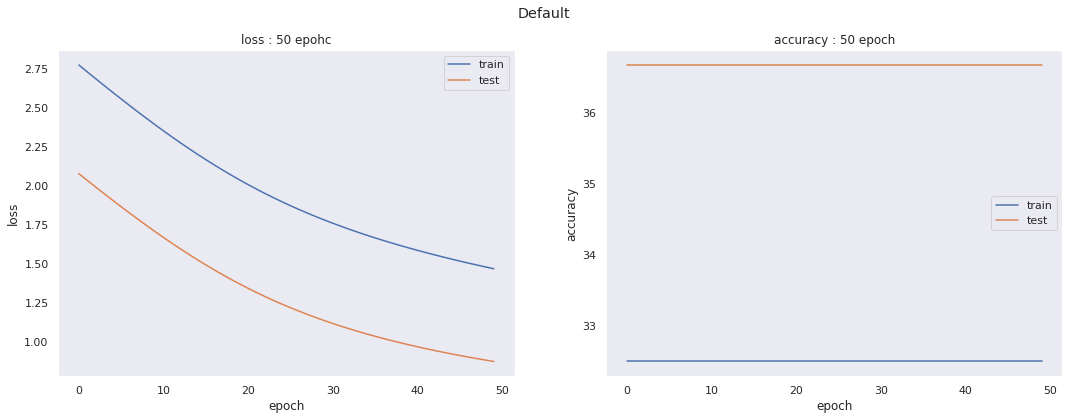

In [266]:
# We will define two important hyper-parameters here: epoch and learning rate
# https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

# Now we will instantiate our model with w,b we used above and use default epoch size and learning rate
model = Model(w,b)
# fit the model
record = model.fit(xtrain, ytrain, xtest, ytest,1)

from pylab import rcParams
rcParams['figure.figsize'] = 18, 6

# now plot losses the data in result with legend for train and test
plt.subplot(1,2,1)
# Requirements for the plot
"""
1.Must have legend
2.Must have xlabel and ylabel
3.Must have grid enabled
4.Must have sub-title
"""

plt.plot(record['train']['loss'], label = 'train')
plt.plot(record['test']['loss'], label = 'test')
plt.title('loss : 50 epohc')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.plot()

# now plot accuracy the data in result with legend for train and test
ax = plt.subplot(1,2,2)
# Requirements for the plot
"""
1.Must have legend
2.Must have xlabel and ylabel
3.Must have grid enabled
4.Must have sub-title
"""

plt.plot(record['train']['accuracy'], label = 'train')
plt.plot(record['test']['accuracy'], label = 'test')
plt.title('accuracy : 50 epoch')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

# This will add main title
plt.suptitle(f'Default')
plt.plot()


In [0]:
# Now repeat similar plot for following configurations
config_1 = {'w':np.random.randn(4,3),'b':np.random.randn(1,3),'epoch':500,  'learning_rate' : 1e-3,}
config_2 = {'w':np.random.randn(4,3),'b':np.random.randn(1,3),'epoch':5000, 'learning_rate' : 1}
config_3 = {'w':np.random.randn(4,3),'b':np.random.randn(1,3),'epoch':5000, 'learning_rate' : 1e-1}
config_4 = {'w':np.random.randn(4,3),'b':np.random.randn(1,3),'epoch':5000, 'learning_rate' : 1e-7}
config_5 = {'w':np.random.randn(4,3),'b':np.random.randn(1,3),'epoch':5000, 'learning_rate' : 3}
config_6 = {'w':np.random.randn(4,3),'b':np.random.randn(1,3),'epoch':5000, 'learning_rate' : 10}

*EXERCISE NO. 1 : TASK 13*

> **SCORE : 5**



In [0]:
# It is useless to write long code again and again so lets write a function that takes following arguments
# So we will write a funciton  that takes above configuration and return a plot
def plotwithconfig(config):
  model = Model(**config)
  record = model.fit(xtrain, ytrain, xtest, ytest)
  print(record.keys())
  # Now study above code and fill this for loop
  # You must fullfill plot requirements as asked above
  rcParams['figure.figsize'] = 18, 6
  
  for i,l in enumerate(['loss','accuracy']):
    plt.subplot(1, 2, i+1) 
    plt.plot(record['train'][l], label = 'train' + l)
    plt.plot(record['test'][l], label = 'test' + l)
    plt.title(l +'epoch')
    plt.xlabel('epoch')
    plt.ylabel(l + ' loss')
    plt.legend()
    plt.grid()
    plt.plot()
    




    plt.suptitle(f"epoch : {config.get('epoch')}, learning_rate : {config.get('learning_rate')}")

*EXERCISE NO. 1 : TASK 14*

> **SCORE : 0.5x6=3**



 33%|███▎      | 166/500 [00:00<00:00, 1640.62it/s, loss : 0.87, accuracy : 36.67]

(120, 4)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am

100%|██████████| 500/500 [00:00<00:00, 1690.86it/s, loss : 0.78, accuracy : 36.67]


I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (12

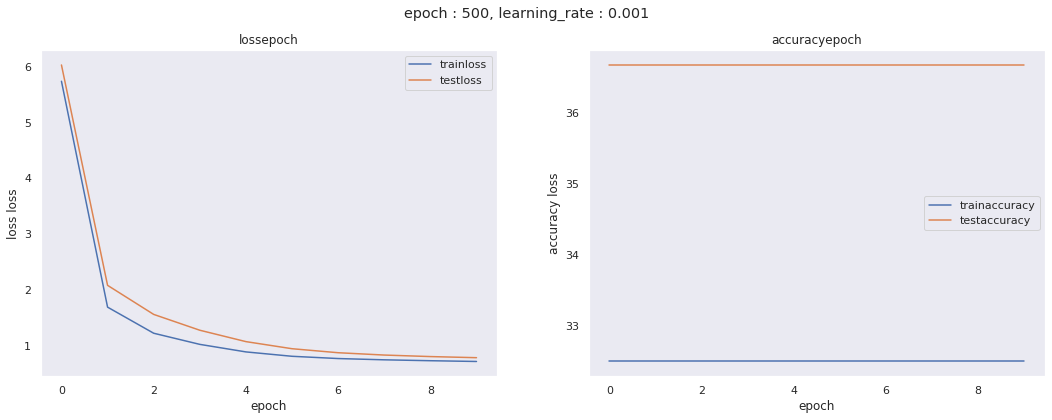

In [269]:
# Plot config1
plotwithconfig(config_1)

  3%|▎         | 151/5000 [00:00<00:03, 1470.95it/s, loss : 0.98, accuracy : 36.67]

(120, 4)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am

 13%|█▎        | 636/5000 [00:00<00:02, 1562.73it/s, loss : 0.91, accuracy : 36.67]

(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am

 19%|█▉        | 969/5000 [00:00<00:02, 1607.74it/s, loss : 0.80, accuracy : 36.67]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

 26%|██▌       | 1301/5000 [00:00<00:02, 1613.22it/s, loss : 0.71, accuracy : 36.67]

(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am

 33%|███▎      | 1634/5000 [00:01<00:02, 1634.16it/s, loss : 0.65, accuracy : 36.67]

(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am

 39%|███▉      | 1959/5000 [00:01<00:01, 1616.86it/s, loss : 0.61, accuracy : 36.67]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (12

 46%|████▌     | 2289/5000 [00:01<00:01, 1633.05it/s, loss : 0.58, accuracy : 36.67]

(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am

 53%|█████▎    | 2654/5000 [00:01<00:01, 1696.03it/s, loss : 0.55, accuracy : 36.67]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (12

 60%|██████    | 3019/5000 [00:01<00:01, 1737.12it/s, loss : 0.53, accuracy : 36.67]


I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (1

 67%|██████▋   | 3368/5000 [00:02<00:00, 1643.29it/s, loss : 0.51, accuracy : 36.67]

(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am

 74%|███████▍  | 3719/5000 [00:02<00:00, 1692.29it/s, loss : 0.50, accuracy : 36.67]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (12

 81%|████████  | 4056/5000 [00:02<00:00, 1633.91it/s, loss : 0.49, accuracy : 36.67]


I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (1

 88%|████████▊ | 4401/5000 [00:02<00:00, 1672.49it/s, loss : 0.48, accuracy : 36.67]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (12

 95%|█████████▌| 4753/5000 [00:02<00:00, 1708.93it/s, loss : 0.47, accuracy : 36.67]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (12

100%|██████████| 5000/5000 [00:02<00:00, 1669.65it/s, loss : 0.47, accuracy : 36.67]


(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am

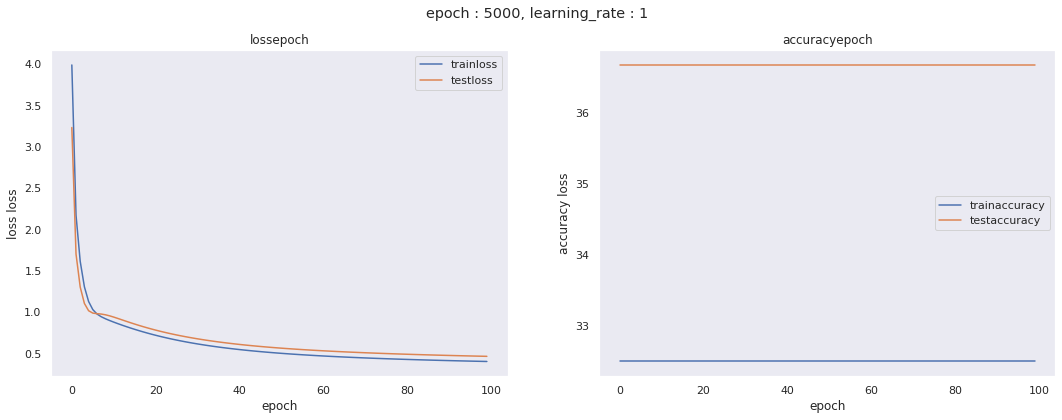

In [270]:
# Plot config2
plotwithconfig(config_2)

  6%|▋         | 318/5000 [00:00<00:02, 1561.02it/s, loss : 0.59, accuracy : 36.67]

(120, 4)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am

 13%|█▎        | 651/5000 [00:00<00:02, 1599.15it/s, loss : 0.49, accuracy : 36.67]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

 20%|██        | 1001/5000 [00:00<00:02, 1652.00it/s, loss : 0.47, accuracy : 36.67]


I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (1

 27%|██▋       | 1351/5000 [00:00<00:02, 1681.53it/s, loss : 0.45, accuracy : 36.67]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

 34%|███▍      | 1690/5000 [00:01<00:01, 1681.47it/s, loss : 0.44, accuracy : 36.67]

(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am

 41%|████      | 2051/5000 [00:01<00:01, 1737.68it/s, loss : 0.43, accuracy : 36.67]

(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am

 48%|████▊     | 2401/5000 [00:01<00:01, 1735.96it/s, loss : 0.42, accuracy : 36.67]


I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (1

 55%|█████▌    | 2765/5000 [00:01<00:01, 1770.54it/s, loss : 0.41, accuracy : 36.67]

(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am

 63%|██████▎   | 3141/5000 [00:01<00:01, 1808.08it/s, loss : 0.40, accuracy : 36.67]


I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (1

 70%|███████   | 3503/5000 [00:02<00:00, 1727.33it/s, loss : 0.40, accuracy : 36.67]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

 77%|███████▋  | 3851/5000 [00:02<00:00, 1704.79it/s, loss : 0.39, accuracy : 36.67]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

 84%|████████▍ | 4193/5000 [00:02<00:00, 1700.60it/s, loss : 0.39, accuracy : 36.67]


I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (1

 91%|█████████ | 4537/5000 [00:02<00:00, 1693.01it/s, loss : 0.38, accuracy : 36.67]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (12

 98%|█████████▊| 4881/5000 [00:02<00:00, 1690.70it/s, loss : 0.38, accuracy : 36.67]

(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am

100%|██████████| 5000/5000 [00:02<00:00, 1709.88it/s, loss : 0.38, accuracy : 36.67]


(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
dict_keys(['train', 'test'])


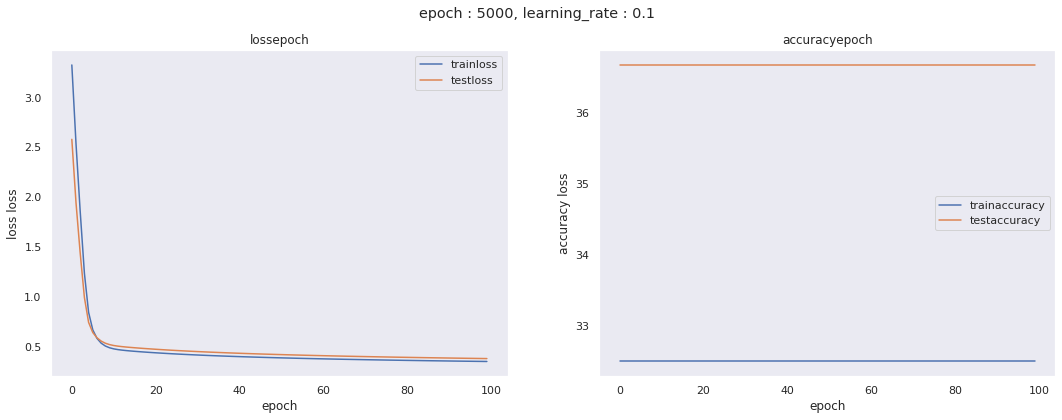

In [271]:
# Plot config3
plotwithconfig(config_3)

  7%|▋         | 369/5000 [00:00<00:02, 1885.00it/s, loss : 0.60, accuracy : 36.67]

(120, 4)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am

 14%|█▍        | 714/5000 [00:00<00:02, 1797.57it/s, loss : 0.55, accuracy : 36.67]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (12

 22%|██▏       | 1078/5000 [00:00<00:02, 1797.40it/s, loss : 0.51, accuracy : 36.67]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (12

 29%|██▊       | 1430/5000 [00:00<00:02, 1764.98it/s, loss : 0.48, accuracy : 36.67]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (12

 35%|███▌      | 1764/5000 [00:01<00:01, 1697.03it/s, loss : 0.46, accuracy : 36.67]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (12

 42%|████▏     | 2107/5000 [00:01<00:01, 1681.23it/s, loss : 0.44, accuracy : 36.67]

 (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am

 50%|████▉     | 2494/5000 [00:01<00:01, 1794.73it/s, loss : 0.43, accuracy : 36.67]


I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (1

 57%|█████▋    | 2853/5000 [00:01<00:01, 1757.96it/s, loss : 0.42, accuracy : 36.67]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (12

 64%|██████▍   | 3204/5000 [00:01<00:01, 1734.81it/s, loss : 0.41, accuracy : 36.67]


I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (1

 71%|███████▏  | 3568/5000 [00:02<00:00, 1743.10it/s, loss : 0.40, accuracy : 36.67]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (12

 78%|███████▊  | 3919/5000 [00:02<00:00, 1735.13it/s, loss : 0.40, accuracy : 36.67]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (12

 85%|████████▌ | 4263/5000 [00:02<00:00, 1688.40it/s, loss : 0.39, accuracy : 36.67]

 (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am

 92%|█████████▏| 4605/5000 [00:02<00:00, 1674.12it/s, loss : 0.39, accuracy : 36.67]

(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am

 99%|█████████▉| 4969/5000 [00:02<00:00, 1729.74it/s, loss : 0.38, accuracy : 36.67]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

100%|██████████| 5000/5000 [00:02<00:00, 1737.21it/s, loss : 0.38, accuracy : 36.67]


(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
dict_keys(['train', 'test'])


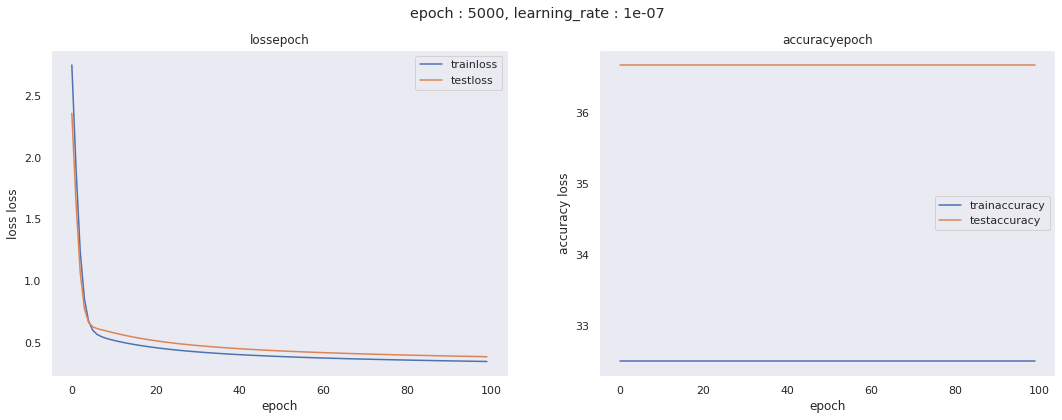

In [272]:
# Plot config4
plotwithconfig(config_4)

  7%|▋         | 344/5000 [00:00<00:02, 1728.96it/s, loss : 3.24, accuracy : 36.67]

(120, 4)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am

 14%|█▎        | 682/5000 [00:00<00:02, 1705.62it/s, loss : 1.40, accuracy : 36.67]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

 20%|██        | 1006/5000 [00:00<00:02, 1648.48it/s, loss : 0.75, accuracy : 36.67]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (12

 27%|██▋       | 1326/5000 [00:00<00:02, 1622.19it/s, loss : 0.67, accuracy : 36.67]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

 33%|███▎      | 1642/5000 [00:01<00:02, 1546.51it/s, loss : 0.62, accuracy : 36.67]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

 39%|███▉      | 1966/5000 [00:01<00:01, 1580.78it/s, loss : 0.59, accuracy : 36.67]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (12

 46%|████▌     | 2304/5000 [00:01<00:01, 1636.50it/s, loss : 0.56, accuracy : 36.67]

(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am

 53%|█████▎    | 2641/5000 [00:01<00:01, 1647.70it/s, loss : 0.53, accuracy : 36.67]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (12

 60%|██████    | 3001/5000 [00:01<00:01, 1692.87it/s, loss : 0.51, accuracy : 36.67]

(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am

 67%|██████▋   | 3346/5000 [00:02<00:00, 1693.16it/s, loss : 0.50, accuracy : 36.67]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

 74%|███████▍  | 3689/5000 [00:02<00:00, 1683.53it/s, loss : 0.48, accuracy : 36.67]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (12

 81%|████████  | 4031/5000 [00:02<00:00, 1681.77it/s, loss : 0.47, accuracy : 36.67]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (12

 87%|████████▋ | 4366/5000 [00:02<00:00, 1643.21it/s, loss : 0.46, accuracy : 36.67]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (12

 94%|█████████▍| 4703/5000 [00:02<00:00, 1650.84it/s, loss : 0.45, accuracy : 36.67]


I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (1

100%|██████████| 5000/5000 [00:03<00:00, 1646.06it/s, loss : 0.45, accuracy : 36.67]


 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

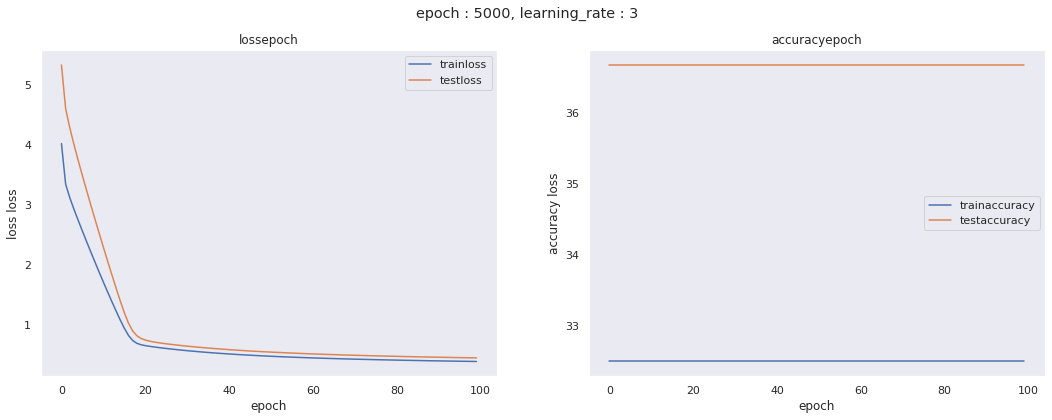

In [273]:
# Plot config5
plotwithconfig(config_5)

  8%|▊         | 398/5000 [00:00<00:02, 1988.41it/s, loss : 0.64, accuracy : 36.67]

(120, 4)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am

 15%|█▍        | 731/5000 [00:00<00:02, 1792.92it/s, loss : 0.51, accuracy : 36.67]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

 22%|██▏       | 1081/5000 [00:00<00:02, 1767.14it/s, loss : 0.47, accuracy : 36.67]

I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120

 29%|██▊       | 1426/5000 [00:00<00:02, 1740.71it/s, loss : 0.43, accuracy : 36.67]


I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (1

 36%|███▌      | 1777/5000 [00:01<00:01, 1737.45it/s, loss : 0.41, accuracy : 36.67]

(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am

 42%|████▏     | 2113/5000 [00:01<00:01, 1610.32it/s, loss : 0.40, accuracy : 36.67]

(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am

 49%|████▉     | 2444/5000 [00:01<00:01, 1625.67it/s, loss : 0.38, accuracy : 36.67]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

 56%|█████▌    | 2785/5000 [00:01<00:01, 1662.98it/s, loss : 0.37, accuracy : 36.67]

(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am

 62%|██████▎   | 3125/5000 [00:01<00:01, 1656.93it/s, loss : 0.37, accuracy : 36.67]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (12

 69%|██████▉   | 3453/5000 [00:02<00:00, 1609.27it/s, loss : 0.36, accuracy : 36.67]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (12

 76%|███████▌  | 3792/5000 [00:02<00:00, 1644.42it/s, loss : 0.35, accuracy : 36.67]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

 83%|████████▎ | 4142/5000 [00:02<00:00, 1695.02it/s, loss : 0.34, accuracy : 36.67]

(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am

 90%|████████▉ | 4480/5000 [00:02<00:00, 1646.98it/s, loss : 0.34, accuracy : 36.67]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

 97%|█████████▋| 4828/5000 [00:02<00:00, 1694.80it/s, loss : 0.34, accuracy : 36.67]

(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am

100%|██████████| 5000/5000 [00:02<00:00, 1683.19it/s, loss : 0.33, accuracy : 36.67]



I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (1

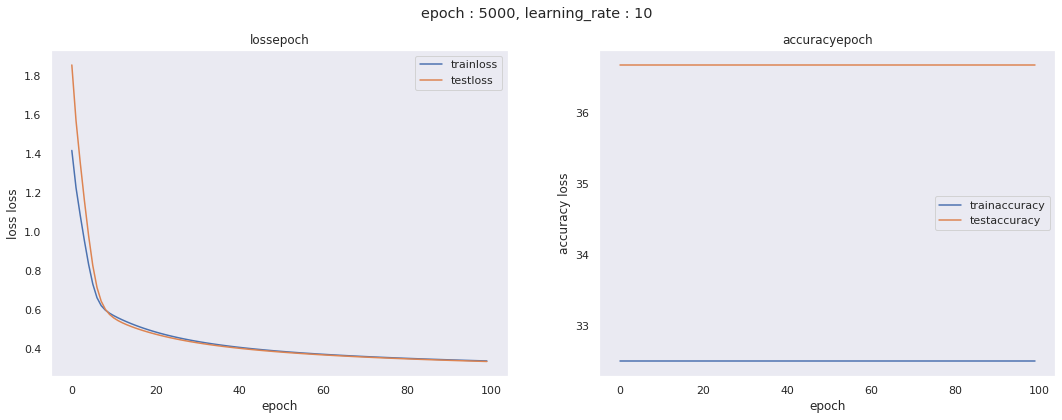

In [274]:
# Plot config6
plotwithconfig(config_6)

*EXERCISE NO. 1 : TASK 15*

> **SCORE : 5**



In [288]:
# Now compare all these configuration
# What are the two important things you observe from the experiment??
# Your answer goes here

'When using a value near at 1e-7 better results were produced because of the convergence of the graphs'
'Very small values, or overly large values did not seem to work as well. The corresponding graphs varried greater.'




'Very small values, or overly large values did not seem to work as well. The corresponding graphs varried greater.'

*EXERCISE NO. 1 : TASK 16*

> **SCORE : 5**



  7%|▋         | 349/5000 [00:00<00:02, 1785.41it/s, loss : 0.98, accuracy : 3.33]

(120, 4)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am

 15%|█▍        | 729/5000 [00:00<00:02, 1819.66it/s, loss : 0.78, accuracy : 3.33]

I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (12

 21%|██        | 1062/5000 [00:00<00:02, 1720.09it/s, loss : 0.66, accuracy : 3.33]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

 28%|██▊       | 1399/5000 [00:00<00:02, 1697.66it/s, loss : 0.57, accuracy : 3.33]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (12

 35%|███▌      | 1750/5000 [00:01<00:01, 1723.58it/s, loss : 0.50, accuracy : 3.33]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

 42%|████▏     | 2093/5000 [00:01<00:01, 1715.54it/s, loss : 0.45, accuracy : 3.33]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

 49%|████▊     | 2429/5000 [00:01<00:01, 1664.60it/s, loss : 0.42, accuracy : 3.33]


I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (1

 56%|█████▌    | 2794/5000 [00:01<00:01, 1734.78it/s, loss : 0.39, accuracy : 3.33]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

 63%|██████▎   | 3138/5000 [00:01<00:01, 1679.21it/s, loss : 0.37, accuracy : 3.33]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (12

 70%|██████▉   | 3481/5000 [00:02<00:00, 1687.68it/s, loss : 0.35, accuracy : 3.33]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (12

 76%|███████▋  | 3817/5000 [00:02<00:00, 1617.32it/s, loss : 0.34, accuracy : 3.33]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

 83%|████████▎ | 4174/5000 [00:02<00:00, 1677.17it/s, loss : 0.33, accuracy : 3.33]

(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am

 91%|█████████ | 4544/5000 [00:02<00:00, 1751.06it/s, loss : 0.33, accuracy : 3.33]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

 98%|█████████▊| 4893/5000 [00:02<00:00, 1709.35it/s, loss : 0.32, accuracy : 3.33]


I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (12

100%|██████████| 5000/5000 [00:02<00:00, 1708.98it/s, loss : 0.32, accuracy : 3.33]


I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
dict_keys(['train', 'test'])


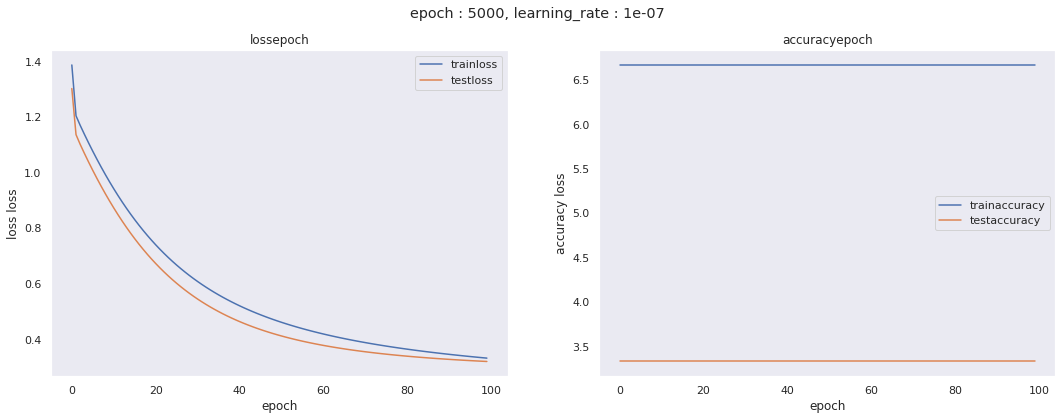

In [275]:
# Now recall the data normalization techniques
# Normalize only x data and then do same experiment with config_4
# you have to compute std and mean along with axis 0 now
# write a function that normalize given xdata
# while calculating std add 1e-10 also
def normalize(xdata):
  std = xdata.std(axis=0) + 1e-10
  mean = xdata.mean(axis=0)
  return (xdata-mean)/std

# Now you will use above function to create xtrain and xtest these are new version of xtrain and xtest
# No need to normalize ytrain and ytest
xtrain = normalize(xtrain)
xtest = normalize(xtest)


# Now use config_4 and do same experiment
plotwithconfig(config_4)

*EXERCISE NO. 1 : TASK 17*

> **SCORE : 5**



In [0]:
# What difference did you get with normalization?? Was it Useful?
#Normalization helped the graphs converge. Yes.



*EXERCISE NO. 1 : TASK 18*

> **SCORE : 3**



In [276]:
# Now from above experiment, chose appropriate hyperparameter and instantiate a model 
# Fit your model on new xtrain, xtest i.e, normalized
best_epoch = 5000
best_learning_rate = 1e-7
model = Model(w,b,epoch=best_epoch,learning_rate=best_learning_rate)
result = model.fit(xtrain, ytrain, xtest, ytest)

  4%|▍         | 189/5000 [00:00<00:02, 1889.63it/s, loss : 0.54, accuracy : 3.33]

(120, 4)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am

 15%|█▌        | 751/5000 [00:00<00:02, 1850.83it/s, loss : 0.46, accuracy : 3.33]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

 22%|██▏       | 1102/5000 [00:00<00:02, 1787.80it/s, loss : 0.42, accuracy : 3.33]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (12

 29%|██▉       | 1451/5000 [00:00<00:02, 1737.86it/s, loss : 0.38, accuracy : 3.33]

(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am

 36%|███▌      | 1783/5000 [00:01<00:01, 1677.34it/s, loss : 0.36, accuracy : 3.33]

(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am

 42%|████▏     | 2115/5000 [00:01<00:01, 1657.18it/s, loss : 0.35, accuracy : 3.33]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (12

 49%|████▉     | 2451/5000 [00:01<00:01, 1665.86it/s, loss : 0.34, accuracy : 3.33]

 (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am

 56%|█████▌    | 2782/5000 [00:01<00:01, 1613.65it/s, loss : 0.34, accuracy : 3.33]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

 62%|██████▏   | 3122/5000 [00:01<00:01, 1640.67it/s, loss : 0.34, accuracy : 3.33]

(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am

 69%|██████▉   | 3452/5000 [00:02<00:00, 1622.19it/s, loss : 0.33, accuracy : 3.33]

(120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am

 76%|███████▌  | 3801/5000 [00:02<00:00, 1668.47it/s, loss : 0.33, accuracy : 3.33]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (12

 83%|████████▎ | 4151/5000 [00:02<00:00, 1687.17it/s, loss : 0.33, accuracy : 3.33]

I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (12

 90%|█████████ | 4512/5000 [00:02<00:00, 1741.41it/s, loss : 0.33, accuracy : 3.33]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

 97%|█████████▋| 4864/5000 [00:02<00:00, 1731.49it/s, loss : 0.33, accuracy : 3.33]

 (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I a

100%|██████████| 5000/5000 [00:02<00:00, 1703.42it/s, loss : 0.33, accuracy : 3.33]

 (120, 3)
I am here (30, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)
I am here (120, 3)


*EXERCISE NO. 1 : TASK 19*

> **SCORE : 2**



In [277]:
# Now predict xtest and use confusion matrix example given in references
# Find confusion matrix for multi class problem 
# Plot confusion matrix
# Note output of .predict will be simply label, but ytest is a one hot encoding
# You can use np.argmax to convert ytest from onehot to simple list of 0,1,2 where each represent different 
# classes = ['setosa','versicolor','virginica']
ytest_pred = model.predict(xtest)
 #looks like [0 0 1 1 1 2 2 2 1 2 1 2 1 2 2 0 ..
# ytest looks like [[0,0,1],[1,0,0],.....] which not what we want so we need argmax indices corresponding to respective classes

ytest_true = np.argmax(ytest, axis=1) #use np.argmax here output looks like [0 0 1 1 1 2 2 2 1 2 1 2 1 2 2 0 .. 

print(ytest_pred, ytest_true)

[3 0 1 0 1 3 1 0 0 0 2 0 2 0 2 1 3 2 1 1 3 3 1 1 3 1 1 0 3 1] [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


*EXERCISE NO. 1 : TASK 20*

> **SCORE : 10**



In [0]:
# Import sklearn confusion metrix
# Please see documentation of confusion_matrix properly and pass right labels name
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
# Please Map your output to actual label name
labels = ['setosa','versicolor','virginica']
# dftarget['label'].apply(lambda x: iris.target_names[0] if x==0 else (iris.target_names[1] if x==1  else iris.target_names[2]))

ytest_pred = list(map(lambda x: (labels[0] if x==0 else (labels[1] if x==1  else labels[2])), ytest_pred))
#instead of [0,1,0,2,2...] output should be ['setosa','versicolor',.....]
ytest_true = list(map(lambda x: (labels[0] if x==0 else (labels[1] if x==1  else labels[2])), ytest_true))
#instead of [0,1,0,2,2...] output should be ['setosa','versicolor',.....]
cmatrix = confusion_matrix(ytest_true, ytest_pred, labels) #use labels name as well

*EXERCISE NO. 1 : TASK 21*

> **SCORE : 10**



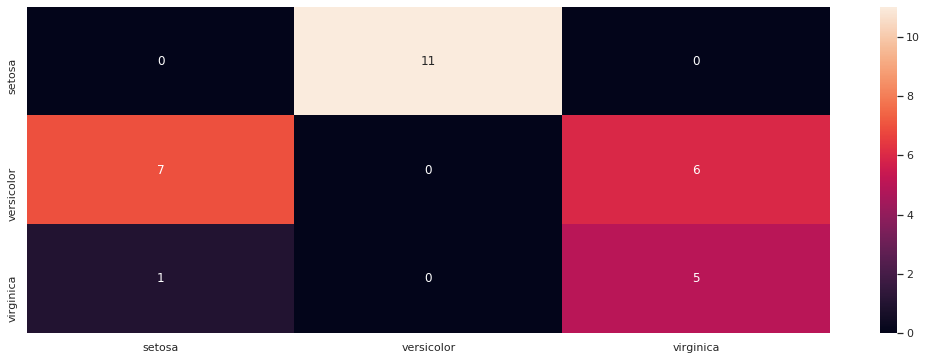

In [279]:
# Import seaborn and use heatmap
# Use annot and cbar as True, and xticklabels and yticklabels should be labels we talked before
import seaborn as sns
sns.heatmap(cmatrix, annot=True, cbar=True, xticklabels= labels, yticklabels=labels)

*EXERCISE NO. 1 : TASK 22*

> **SCORE : 5**



In [280]:
# In this section we will do some area under curve or roc curve thing
# You can study about ROC curve from given references or more from internet
# To make things simpler we are going to have 3 different roc curve for 3 different classes 
# For ROC curve we need actual probability so we will now use .probability function from model to get the probability
# We have to split this probability into 3 different vectors column wise
# We have to split ytest as well into 3 different vectors column wise you can use np.hsplit to split into 3 different columns
# See documentation for further info

ytest_prob = model.probability(xtest)
prob_class1, prob_class2, prob_class3 = np.hsplit(ytest_prob, 3)
class1, class2, class3 = np.hsplit(ytest, 3)

# Now use following two function
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

I am here (30, 3)


*EXERCISE NO. 1 : TASK 23*

> **SCORE : 5**



auc_score for class setosa = 1.0
auc_score for class versicolor = 0.7737556561085973
auc_score for class virginica = 1.0


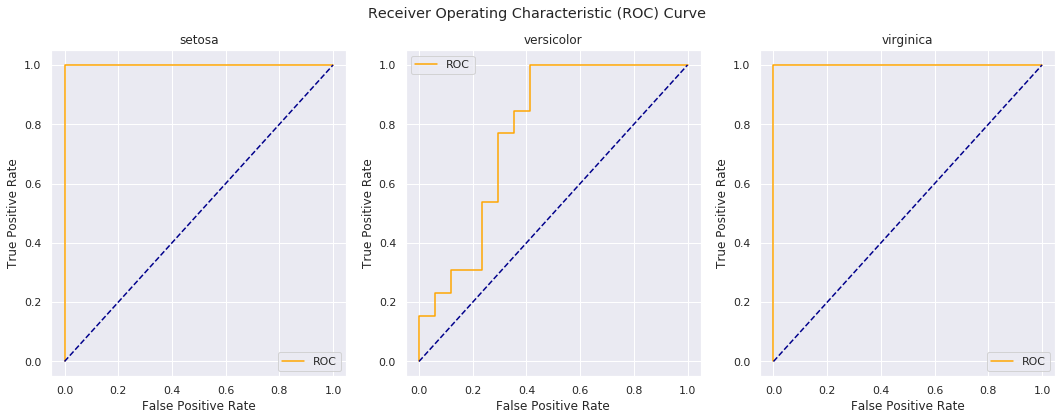

In [281]:
# Now we will write a function to plot 3 different roc curve
# this function will take ytes_prob not splitted ones, ytest not splitted ones and labels as input
# Complete this function
def plot_them_all(ytest_prob, ytest, labels):
 
  probs = prob_class1, prob_class2, prob_class3 #split probability probs is the list of probability for class1,class2 and class3
  ytrues = class1, class2, class3 #split ytrue 

  for i,(prob,ytrue,label) in enumerate(zip(probs,ytrues, labels)):
    plt.subplot(1,3,i+1)
    

    fpr, tpr, thresholds = roc_curve(ytrue, prob) #use roc_curve here, see docx for info
    auc_score = roc_auc_score(ytrue, prob) # calculate roc_curve score here
    
    print(f'auc_score for class {label} = {auc_score}')
    plt.plot(fpr, tpr, color='orange', label='ROC')
    
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.title(f'{label}')
    plt.legend()
  
  plt.suptitle('Receiver Operating Characteristic (ROC) Curve')


# Now finally pltothemall
plot_them_all(ytest_prob, ytest, labels)


*EXERCISE NO. 1 : TASK 24*

> **SCORE : 15**



In [282]:
# What are your 3 major observation in this experiment??
# Your answer goes here
'1.setosa and virginica show the best case scenario'
'2. versicolor graph of is not as good at the others'
'3. Shows consistency'



'3. Shows consistency'

### 2. Implementing LDA from Scratch
---



---



***EXERCISE NO. 2***

> **SCORE : 15 + 20 * 2 = 55**



In [0]:
# Please follow following posts
# https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2
# This post has step wise step method to implement LDA from scratch
# You will be doing same task on LDA but this time you will be using iris data set
# Remember we have already loaded iris dataset as dataframe

# You have to achieve following tasks

# SCORE 15 + 20X2
# Task 1 : Compute class_feature_means for all the variable in our dataset

# Task 2 : Compute eigen_values and eigen_vectors and also show Explained Variance,
#          w_matrix and X_lda and use label encoder to fit_transform as shown in example

# Task 3 : Finally Visualize your result



In [283]:
"""
NOTICE:
YOU CAN USE AS MANY CELLS AS YOU WANT FOR ABOVE QUESTION
"""


'\nNOTICE:\nYOU CAN USE AS MANY CELLS AS YOU WANT FOR ABOVE QUESTION\n'

*EXERCISE NO. 2 : TASK 1*

> **SCORE : 20**



In [284]:
# Task 1 : Compute class_feature_means for all the variable in our dataset

from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = pd.DataFrame(data = iris.data, columns=iris.feature_names)
# Create dftarget dataframe using target as data and ['label'] as column
y =  pd.Categorical.from_codes(iris.target, iris.target_names)
ND = X.join(pd.Series(y, name='class'))

# X = pd.DataFrame(wine.data, columns=wine.feature_names)
# y = pd.Categorical.from_codes(wine.target, wine.target_names)


class_feature_means = pd.DataFrame(columns=iris.target_names)
for c, rows in ND.groupby('class'):
    class_feature_means[c] = rows.mean()
    class_feature_means

class_feature_means

print(ND)
print(class_feature_means)

     sepal length (cm)  sepal width (cm)  ...  petal width (cm)      class
0                  5.1               3.5  ...               0.2     setosa
1                  4.9               3.0  ...               0.2     setosa
2                  4.7               3.2  ...               0.2     setosa
3                  4.6               3.1  ...               0.2     setosa
4                  5.0               3.6  ...               0.2     setosa
..                 ...               ...  ...               ...        ...
145                6.7               3.0  ...               2.3  virginica
146                6.3               2.5  ...               1.9  virginica
147                6.5               3.0  ...               2.0  virginica
148                6.2               3.4  ...               2.3  virginica
149                5.9               3.0  ...               1.8  virginica

[150 rows x 5 columns]
                   setosa  versicolor  virginica
sepal length (cm)   5.006  

*EXERCISE NO. 2 : TASK 2*

> **SCORE : 20**



In [286]:
within_class_scatter_matrix = np.zeros((4,4))
for c, rows in ND.groupby('class'):
      rows = rows.drop(['class'], axis=1)
    
      s = np.zeros((4,4))
for index, row in rows.iterrows():
        x, mc = row.values.reshape(4,1), class_feature_means[c].values.reshape(4,1)
        
        s += (x - mc).dot((x - mc).T)
    
        within_class_scatter_matrix += s

zeros = np.zeros((4,4))
feature_means = ND.mean()
between_class_scatter_matrix = zeros
for c in class_feature_means:    
    n = len(ND.loc[ND['class'] == c].index)
    
    mc, m = class_feature_means[c].values.reshape(4,1), feature_means.values.reshape(4,1)
    
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])


eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

w_matrix = np.hstack((pairs[0][1].reshape(4,1), pairs[1][1].reshape(4,1))).real

X_lda = np.array(X.dot(w_matrix))

le = LabelEncoder()
y = le.fit_transform(ND['class'])

3.334013793023332
0.027034739042873984
6.512340545361995e-16
2.9013106987339024e-16
Explained Variance
Eigenvector 0: 0.9919564568065745
Eigenvector 1: 0.008043543193425526
Eigenvector 2: 1.9375919399052923e-16
Eigenvector 3: 8.632159491461792e-17


*EXERCISE NO. 2 : TASK 3*

> **SCORE : 20**



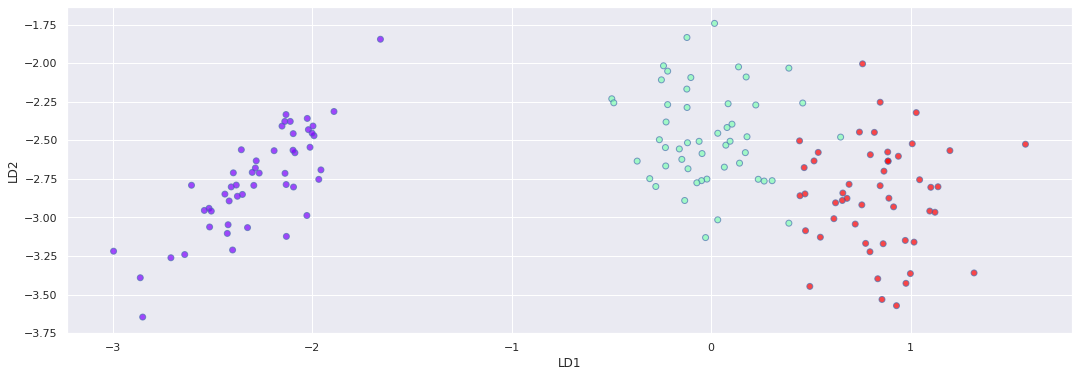

In [287]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

### 3. Understanding and implementing LDA and QDA using scikitlearn
---



---



***EXERCISE NO. 3***

> **SCORE : 5x6=30**



In [0]:
# Visit given references
# In scikit learn you can see multiple examples of LDA and QDA 
# Implement these examples in two versions of our data and compare the results


# Version 1, non-normalized data
# Version 2, normalized data


# You have to perform following task

# SCORE : 5X2
# Task 1: Create non-normalized dataset from iris_data [you can use code from above], xtrain,xtest,ytrain,ytest
# Task 2: Create normalized dataset from iris_data [you can use code from above], nxtrain,nxtest,ytrain,ytest

# SCORE : 10X2
# Task 3: Use LDA from sklearn, initialize a model and fit LDA
# Task 4: Use QDA from sklearn, initialize a model and fit QDA

# SCORE : 5 + 5
# Task 5: Get Accuracy on both train and test set and compare this with normalized and non-normalized version
# Task 6: Discuss an important thing you observed in this experiment?? What is the fundamental difference between QDA and LDA?




In [0]:
"""
NOTICE:
YOU CAN USE AS MANY CELLS AS YOU WANT FOR ABOVE QUESTION
"""
print()

*EXERCISE NO. 3 : TASK 1*

> **SCORE : 5**



In [0]:


from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


xtrain,xtest,ytrain,ytest = train_test_split(X, y, random_state=1)



nxtrain,nxtest,ytrain,ytest = train_test_split(X, y, random_state=1)

nxtrain = normalize(nxtrain)
nxtest = normalize(nxtest)

*EXERCISE NO. 3 : TASK 2*

> **SCORE : 5**



In [303]:
LDA_Model= LinearDiscriminantAnalysis()
LDA_Model.fit(X, y)
LinearDiscriminantAnalysis()

qda = QuadraticDiscriminantAnalysis()
QDA_Model = qda.fit(xtrain, ytrain)

print(QDA_Model.priors_)



lda = LinearDiscriminantAnalysis()
model_lda = lda.fit(xtrain, ytrain)

print(model_lda.priors_)





[0.5022 0.4978]
[0.5022 0.4978]


*EXERCISE NO. 3 : TASK 3*

> **SCORE : 5**



In [306]:
xtest = test[, !( names( test ) %in% c( "class" ) ) ]  
QDA_model.results = predict( model, X_test )

xtest = test[, !( names( test ) %in% c( "class" ) ) ]  
model_lda.results = predict( model, X_test )

SyntaxError: ignored

*EXERCISE NO. 3 : TASK 4*

> **SCORE : 5**



*EXERCISE NO. 3 : TASK 5*

> **SCORE : 5**



*EXERCISE NO. 3 : TASK 6*

> **SCORE : 5**

